In [1]:
import pandas as pd
import random
import panel as pn

# Ensure the Panel extension is activated
pn.extension()

# Define the mappings from numbers to words and colors
number_to_word_map = {
    0: "Unavailable",
    1: "Pass",
    2: "Degraded",
    3: "Fail",
    4: "Unknown",
    5: "NoImport",
    6: "Danger",
    7: "TotalCollapse"
}

number_to_color_map = {
    0: "white",  # Unavailable
    1: "green",  # Pass
    2: "yellow", # Degraded
    3: "red",    # Fail
    4: "grey",   # Unknown
    5: "blue",   # NoImport
    6: "purple", # Danger
    7: "black"   # TotalCollapse
}

# Dictionary keys
keys = [
    "static", "dynamic", "function", "functional",
    "operational", "spacial", "polar", "horizontal",
    "vertical", "frequency"
]

class CustomDataFrame:
    def __init__(self, num_rows):
        self.columns = self.generate_columns()
        self.df = pd.DataFrame(columns=self.columns)
        self.fill_random_integers(num_rows)

    def generate_columns(self):
        columns = []
        for i in range(8):
            for j in range(4):
                columns.append(self.generate_string(i, j))
        return columns

    @staticmethod
    def generate_string(num1, num2):
        initial_part = f"[{num1}]{random.choice(keys)}[{num2}]"
        while len(initial_part) <= 64:
            if random.choice([True, False]):
                initial_part = random.choice(keys) + "_" + initial_part
            else:
                initial_part = initial_part + "_" + random.choice(keys)
        return initial_part

    def fill_random_integers(self, num_rows):
        data = [{col: number_to_word_map[random.randint(0, 7)] for col in self.columns} for _ in range(num_rows)]
        self.df = pd.DataFrame(data)

# Instantiate the CustomDataFrame with 10 rows as an example
dataframe_class = CustomDataFrame(num_rows=200)
dataframe_class.df.to_csv("custom_dataframe.csv")

# Function to create a widget for each value in the selected row, along with a label
def display_row_widgets(row_index):
    selected_data = dataframe_class.df.iloc[row_index]
    widgets = []
    for col, val in selected_data.items():
        # Map value to color
        color = number_to_color_map[list(number_to_word_map.values()).index(val)]
        value_widget = pn.widgets.TextInput(value=val, disabled=True, width=150, background=color, css_classes=['colored-text-input'])
        label_widget = pn.pane.Markdown(f'**{col}**', width=200)
        widgets.append(pn.Row(label_widget, value_widget))
    return pn.Column(*widgets, name='Row Data')

# Apply custom CSS for the TextInput background color
pn.extension(raw_css=[ """.colored-text-input .bk input { color: black; background-color: inherit; }"""])

# Slider widget to select the row
row_slider = pn.widgets.IntSlider(name='Row', start=0, end=len(dataframe_class.df)-1, step=1, width=400)

# Dynamically update the displayed row's widgets when the slider value changes
@pn.depends(row_slider.param.value)
def update_display(row_index):
    return display_row_widgets(row_index)

# Create and display the dashboard
dashboard = pn.Column("# Custom DataFrame Viewer", row_slider, update_display)
dashboard.servable()
#%store dataframe_class

/tmp/ipykernel_27991/4147770139.py:76: PanelDeprecationWarning: "TextInput(..., background='white')" is deprecated and will be removed in version 1.4, use "TextInput(..., styles={'background': 'white'})" instead.
  value_widget = pn.widgets.TextInput(value=val, disabled=True, width=150, background=color, css_classes=['colored-text-input'])
/tmp/ipykernel_27991/4147770139.py:76: PanelDeprecationWarning: "TextInput(..., background='purple')" is deprecated and will be removed in version 1.4, use "TextInput(..., styles={'background': 'purple'})" instead.
  value_widget = pn.widgets.TextInput(value=val, disabled=True, width=150, background=color, css_classes=['colored-text-input'])
/tmp/ipykernel_27991/4147770139.py:76: PanelDeprecationWarning: "TextInput(..., background='grey')" is deprecated and will be removed in version 1.4, use "TextInput(..., styles={'background': 'grey'})" instead.
  value_widget = pn.widgets.TextInput(value=val, disabled=True, width=150, background=color, css_classe

Column
    [0] Markdown(str)
    [1] IntSlider(end=199, name='Row', width=400)
    [2] ParamFunction(function, _pane=Column, defer_load=False)

In [2]:
df = dataframe_class.df


In [ ]:
df.sample(1
        )

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Convert the CustomDataFrame to a pandas DataFrame
df = pd.DataFrame(dataframe_class.df.to_dict())
df = df.replace("Unavailable", np.nan)
# Convert the DataFrame to a numpy array for easier manipulation
data = df.to_numpy()

# Create a heatmap using seaborn
sns.heatmap(data, cmap=sns.color_palette(list(number_to_color_map.values())), xticklabels=df.columns, yticklabels=range(len(df)), cbar=False)

# Set the title and labels
plt.title("Heatmap of CustomDataFrame")
plt.xlabel("Column Names")
plt.ylabel("Row Indices")

# Show the plot
plt.show()

ValueError: could not convert string to float: 'TotalCollapse'

In [5]:
data = dataframe_class.df.to_numpy()



In [6]:
print(data)

[['Unavailable' 'Danger' 'Unknown' ... 'Unknown' 'Degraded' 'Danger']
 ['TotalCollapse' 'Unavailable' 'Unknown' ... 'Unknown' 'Unknown' 'Pass']
 ['Unknown' 'Unknown' 'Fail' ... 'Unknown' 'Unavailable' 'TotalCollapse']
 ...
 ['Unavailable' 'Degraded' 'Unavailable' ... 'Unknown' 'Fail' 'NoImport']
 ['TotalCollapse' 'Fail' 'Fail' ... 'Unavailable' 'TotalCollapse' 'Fail']
 ['TotalCollapse' 'Fail' 'TotalCollapse' ... 'Degraded' 'Pass' 'Unknown']]


In [13]:
import pandas as pd
import random
import panel as pn

# Ensure the Panel extension is activated
pn.extension()

# Define the mappings from numbers to words and colors
number_to_word_map = {
    0: "Unavailable",
    1: "Pass",
    2: "Degraded",
    3: "Fail",
    4: "Unknown",
    5: "NoImport",
    6: "Danger",
    7: "TotalCollapse"
}

number_to_color_map = {
    0: "white",  # Unavailable
    1: "green",  # Pass
    2: "yellow", # Degraded
    3: "red",    # Fail
    4: "grey",   # Unknown
    5: "blue",   # NoImport
    6: "purple", # Danger
    7: "black"   # TotalCollapse
}

# Dictionary keys
keys = [
    "static", "dynamic", "function", "functional",
    "operational", "spacial", "polar", "horizontal",
    "vertical", "frequency"
]

class CustomDataFrame:
    def __init__(self, num_rows):
        self.columns = self.generate_columns()
        self.df = pd.DataFrame(columns=self.columns)
        self.numeric_df = pd.DataFrame(columns=self.columns)
        self.fill_random_integers(num_rows)

    def generate_columns(self):
        columns = []
        for i in range(8):
            for j in range(4):
                columns.append(self.generate_string(i, j))
        return columns

    @staticmethod
    def generate_string(num1, num2):
        initial_part = f"[{num1}]{random.choice(keys)}[{num2}]"
        while len(initial_part) <= 64:
            if random.choice([True, False]):
                initial_part = random.choice(keys) + "_" + initial_part
            else:
                initial_part = initial_part + "_" + random.choice(keys)
        return initial_part

    def fill_random_integers(self, num_rows):
        data = [{col: number_to_word_map[random.randint(0, 7)] for col in self.columns} for _ in range(num_rows)]
        self.df = pd.DataFrame(data)
        self.numeric_df = pd.DataFrame(data)
        self.numeric_df = self.numeric_df.replace({col: {number_to_word_map[val]: val for val in number_to_word_map.keys()} for col in self.numeric_df.columns})

# Instantiate the CustomDataFrame with 10 rows as an example
dataframe_class = CustomDataFrame(num_rows=200)

# Function to create a widget for each value in the selected row, along with a label
def display_row_widgets(row_index):
    selected_data = dataframe_class.df.iloc[row_index]
    numeric_data = dataframe_class.numeric_df.iloc[row_index]
    widgets = []
    for col, val in selected_data.items():
        # Map value to color
        color = number_to_color_map[list(number_to_word_map.values()).index(val)]

/tmp/ipykernel_27991/335671491.py:66: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.numeric_df = self.numeric_df.replace({col: {number_to_word_map[val]: val for val in number_to_word_map.keys()} for col in self.numeric_df.columns})


In [15]:
import pandas as pd
import random
import panel as pn

# Ensure the Panel extension is activated
pn.extension()

# Define the mappings from numbers to words and colors
number_to_word_map = {
    0: "Unavailable",
    1: "Pass",
    2: "Degraded",
    3: "Fail",
    4: "Unknown",
    5: "NoImport",
    6: "Danger",
    7: "TotalCollapse"
}

number_to_color_map = {
    0: "white",  # Unavailable
    1: "green",  # Pass
    2: "yellow", # Degraded
    3: "red",    # Fail
    4: "grey",   # Unknown
    5: "blue",   # NoImport
    6: "purple", # Danger
    7: "black"   # TotalCollapse
}

# Dictionary keys
keys = [
    "static", "dynamic", "function", "functional",
    "operational", "spacial", "polar", "horizontal",
    "vertical", "frequency"
]

class CustomDataFrame:
    def __init__(self, num_rows):import pandas as pd
import random
import panel as pn

# Ensure the Panel extension is activated
pn.extension()

# Define the mappings from numbers to words and colors
number_to_word_map = {
    0: "Unavailable",
    1: "Pass",
    2: "Degraded",
    3: "Fail",
    4: "Unknown",
    5: "NoImport",
    6: "Danger",
    7: "TotalCollapse"
}

number_to_color_map = {
    0: "white",  # Unavailable
    1: "green",  # Pass
    2: "yellow", # Degraded
    3: "red",    # Fail
    4: "grey",   # Unknown
    5: "blue",   # NoImport
    6: "purple", # Danger
    7: "black"   # TotalCollapse
}

# Dictionary keys
keys = [
    "static", "dynamic", "function", "functional",
    "operational", "spacial", "polar", "horizontal",
    "vertical", "frequency"
]

class CustomDataFrame:
    def __init__(self, num_rows):
        self.columns = self.generate_columns()
        self.df = pd.DataFrame(columns=self.columns)
        self.numeric_df = pd.DataFrame(columns=self.columns)
        self.fill_random_integers(num_rows)

    def generate_columns(self):
        columns = []
        for i in range(8):
            for j in range(4):
                columns.append(self.generate_string(i, j))
        return columns

    @staticmethod
    def generate_string(num1, num2):
        initial_part = f"[{num1}]{random.choice(keys)}[{num2}]"
        while len(initial_part) <= 64:
            if random.choice([True, False]):
                initial_part = random.choice(keys) + "_" + initial_part
            else:
                initial_part = initial_part + "_" + random.choice(keys)
        return initial_part

    def fill_random_integers(self, num_rows):
        data = [{col: number_to_word_map[random.randint(0, 7)] for col in self.columns} for _ in range(num_rows)]
        self.df = pd.DataFrame(data)
        self.numeric_df = pd.DataFrame(data)
        self.numeric_df = self.numeric_df.replace({col: {number_to_word_map[val]: val for val in number_to_word_map.keys()} for col in self.numeric_df.columns})

# Instantiate the CustomDataFrame with 10 rows as an example
dataframe_class = CustomDataFrame(num_rows=200)

# Function to create a widget for each value in the selected row, along with a label
def display_row_widgets(row_index):
    selected_data = dataframe_class.df.iloc[row_index]
    numeric_data = dataframe_class.numeric_df.iloc[row_index]
    widgets = []
    for col, val in selected_data.items():
        # Map value to color
        color = number_to_color_map[list(number_to_word_map.values()).index(val)]
        value_widget = pn.widgets.TextInput(value=val, disabled=True, width=150, background=color, css_classes=['colored-text-input'])
        label_widget = pn.pane.Markdown(f'**{col}**', width=200)
        widgets.append(pn.Row(label_widget, value_widget))
    return pn.Column(*widgets, name='Row Data')

# Apply custom CSS for the TextInput background color
pn.extension(raw_css=[ """.colored-text-input .bk input { color: black; background-color: inherit; }"""])

# Slider widget to select the row
row_slider = pn.widgets.IntSlider(name='Row', start=0, end=len(dataframe_class.df)-1, step=1, width=400)

# Dynamically update the displayed row's widgets when the slider value changes
@pn.depends(row_slider.param.value)
def update_display(row_index):
    return display_row_widgets(row_index)

# Create and display the dashboard
dashboard = pn.Column("# Custom DataFrame Viewer", row_slider, update_display)
dashboard.servable()
        self.columns = self.generate_columns()
        self.df = pd.DataFrame(columns=self.columns)
        self.numeric_df = pd.DataFrame(columns=self.columns)
        self.fill_random_integers(num_rows)

    def generate_columns(self):
        columns = []

IndentationError: unindent does not match any outer indentation level (<string>, line 141)

In [16]:
import pandas as pd
import random
import panel as pn

# Ensure the Panel extension is activated
pn.extension()

# Define the mappings from numbers to words and colors
number_to_word_map = {
    0: "Unavailable",
    1: "Pass",
    2: "Degraded",
    3: "Fail",
    4: "Unknown",
    5: "NoImport",
    6: "Danger",
    7: "TotalCollapse"
}

number_to_color_map = {
    0: "white",  # Unavailable
    1: "green",  # Pass
    2: "yellow", # Degraded
    3: "red",    # Fail
    4: "grey",   # Unknown
    5: "blue",   # NoImport
    6: "purple", # Danger
    7: "black"   # TotalCollapse
}

# Dictionary keys
keys = [
    "static", "dynamic", "function", "functional",
    "operational", "spacial", "polar", "horizontal",
    "vertical", "frequency"
]

class CustomDataFrame:
    def __init__(self, num_rows):
        self.columns = self.generate_columns()
        self.df = pd.DataFrame(columns=self.columns)
        self.numeric_df = pd.DataFrame(columns=self.columns)
        self.fill_random_integers(num_rows)

    def generate_columns(self):
        columns = []
        for i in range(8):
            for j in range(4):
                columns.append(self.generate_string(i, j))
        return columns

    @staticmethod
    def generate_string(num1, num2):
        initial_part = f"[{num1}]{random.choice(keys)}[{num2}]"
        while len(initial_part) <= 64:
            if random.choice([True, False]):
                initial_part = random.choice(keys) + "_" + initial_part
            else:
                initial_part = initial_part + "_" + random.choice(keys)
        return initial_part

    def fill_random_integers(self, num_rows):
        data = [{col: number_to_word_map[random.randint(0, 7)] for col in self.columns} for _ in range(num_rows)]
        self.df = pd.DataFrame(data)
        self.numeric_df = pd.DataFrame(data)
        self.numeric_df = self.numeric_df.replace({col: {number_to_word_map[val]: val for val in number_to_word_map.keys()} for col in self.numeric_df.columns})

# Instantiate the CustomDataFrame with 10 rows as an example
dataframe_class = CustomDataFrame(num_rows=200)

# Function to create a widget for each value in the selected row, along with a label
def display_row_widgets(row_index):
    selected_data = dataframe_class.df.iloc[row_index]
    numeric_data = dataframe_class.numeric_df.iloc[row_index]
    widgets = []
    for col, val in selected_data.items():
        # Map value to color
        color = number_to_color_map[list(number_to_word_map.values()).index(val)]
        value_widget = pn.widgets.TextInput(value=val, disabled=True, width=150, background=color, css_classes=['colored-text-input'])
        label_widget = pn.pane.Markdown(f'**{col}**', width=200)
        widgets.append(pn.Row(label_widget, value_widget))
    return pn.Column(*widgets, name='Row Data')

# Apply custom CSS for the TextInput background color
pn.extension(raw_css=[ """.colored-text-input .bk input { color: black; background-color: inherit; }"""])

# Slider widget to select the row
row_slider = pn.widgets.IntSlider(name='Row', start=0, end=len(dataframe_class.df)-1, step=1, width=400)

# Dynamically update the displayed row's widgets when the slider value changes
@pn.depends(row_slider.param.value)
def update_display(row_index):
    return display_row_widgets(row_index)

# Create and display the dashboard
dashboard = pn.Column("# Custom DataFrame Viewer", row_slider, update_display)
dashboard.servable()

/tmp/ipykernel_27991/2074942841.py:66: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.numeric_df = self.numeric_df.replace({col: {number_to_word_map[val]: val for val in number_to_word_map.keys()} for col in self.numeric_df.columns})


/tmp/ipykernel_27991/2074942841.py:79: PanelDeprecationWarning: "TextInput(..., background='red')" is deprecated and will be removed in version 1.4, use "TextInput(..., styles={'background': 'red'})" instead.
  value_widget = pn.widgets.TextInput(value=val, disabled=True, width=150, background=color, css_classes=['colored-text-input'])
/tmp/ipykernel_27991/2074942841.py:79: PanelDeprecationWarning: "TextInput(..., background='red')" is deprecated and will be removed in version 1.4, use "TextInput(..., styles={'background': 'red'})" instead.
  value_widget = pn.widgets.TextInput(value=val, disabled=True, width=150, background=color, css_classes=['colored-text-input'])
/tmp/ipykernel_27991/2074942841.py:79: PanelDeprecationWarning: "TextInput(..., background='red')" is deprecated and will be removed in version 1.4, use "TextInput(..., styles={'background': 'red'})" instead.
  value_widget = pn.widgets.TextInput(value=val, disabled=True, width=150, background=color, css_classes=['colored-

Column
    [0] Markdown(str)
    [1] IntSlider(end=199, name='Row', width=400)
    [2] ParamFunction(function, _pane=Column, defer_load=False)

In [22]:
# Sample 5 rows from the numeric dataframe
numeric_sample = dataframe_class.numeric_df.sample(5)

# Display the sampled dataframe
numeric_sample

,dynamic_vertical_[0]function[0]_operational_static_functional_frequency,function_static_dynamic_polar_[0]function[1]_function_polar_function,operational_function_dynamic_static_[0]polar[2]_operational_horizontal,dynamic_spacial_functional_[0]dynamic[3]_horizontal_dynamic_frequency,function_frequency_functional_polar_[1]static[0]_functional_operational,static_functional_functional_[1]function[1]_polar_frequency_horizontal,vertical_vertical_polar_[1]spacial[2]_polar_operational_dynamic_polar,spacial_vertical_[1]frequency[3]_function_functional_horizontal_polar,polar_functional_static_[2]horizontal[0]_functional_horizontal_polar,operational_function_function_function_[2]frequency[1]_function_operational,dynamic_operational_polar_operational_[2]static[2]_function_spacial,horizontal_frequency_frequency_[2]function[3]_polar_dynamic_operational,vertical_polar_operational_[3]horizontal[0]_dynamic_function_function,polar_operational_[3]horizontal[1]_static_operational_operational,horizontal_horizontal_polar_vertical_polar_[3]static[2]_horizontal_spacial,operational_spacial_dynamic_[3]static[3]_spacial_static_function_operational,operational_spacial_[4]horizontal[0]_polar_functional_frequency_functional,operational_horizontal_[4]dynamic[1]_static_operational_dynamic_operational,static_dynamic_vertical_[4]vertical[2]_polar_dynamic_static_dynamic,frequency_dynamic_polar_[4]functional[3]_frequency_functional_functional,horizontal_dynamic_static_dynamic_[5]spacial[0]_vertical_dynamic_function,function_dynamic_[5]static[1]_dynamic_vertical_dynamic_functional,frequency_functional_[5]spacial[2]_dynamic_dynamic_polar_horizontal,frequency_functional_vertical_functional_[5]static[3]_dynamic_frequency,functional_function_[6]operational[0]_function_frequency_frequency,polar_functional_vertical_frequency_[6]operational[1]_operational,static_frequency_[6]spacial[2]_polar_operational_spacial_spacial_operational,function_polar_vertical_[6]spacial[3]_frequency_vertical_horizontal,spacial_frequency_static_spacial_[7]operational[0]_polar_functional,static_polar_[7]function[1]_functional_frequency_dynamic_frequency,function_vertical_operational_static_dynamic_[7]polar[2]_polar_horizontal,function_polar_function_polar_[7]spacial[3]_horizontal_polar_vertical
8,0,4,7,1,5,5,1,2,1,1,6,1,6,2,5,7,7,6,6,3,6,0,3,4,7,3,2,2,0,6,0,2
7,7,2,1,4,2,0,1,5,5,1,1,4,2,4,2,6,7,2,4,7,1,0,1,4,0,2,3,3,0,6,0,6
4,4,5,2,0,5,0,7,2,3,3,6,2,0,0,0,1,7,4,5,3,7,7,7,7,4,4,5,0,7,7,1,7
2,1,2,4,7,2,5,5,5,6,4,0,7,0,4,7,4,6,3,6,2,0,2,2,6,0,2,4,3,4,1,5,0
9,4,4,2,4,5,4,0,2,3,3,1,1,5,0,2,7,0,2,7,3,3,7,7,3,0,0,2,2,1,1,7,2


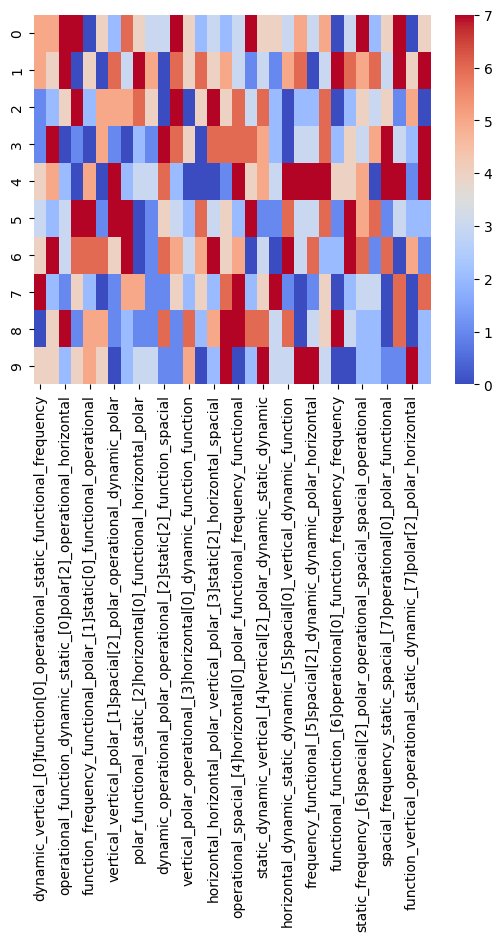

In [23]:
# prompt: modify below so it will render a heat map with these colors for the numeric_df

import matplotlib.pyplot as plt
import seaborn as sns

# Create the heatmap
sns.heatmap(dataframe_class.numeric_df, cmap="coolwarm")

# Display the heatmap
plt.show()


In [26]:
# prompt: how to change the cmap for a custom color '''number_to_color_map = {
#     0: "white",  # Unavailable
#     1: "green",  # Pass
#     2: "yellow", # Degraded
#     3: "red",    # Fail
#     4: "grey",   # Unknown
#     5: "blue",   # NoImport
#     6: "purple", # Danger
#     7: "black"   # TotalCollapse
# }

import matplotlib.pyplot as plt
import seaborn as sns

# Define your custom colormap
number_to_color_map = {
    0: "white",  # Unavailable
    1: "green",  # Pass
    2: "yellow", # Degraded
    3: "red",    # Fail
    4: "grey",   # Unknown
    5: "blue",   # NoImport
    6: "purple", # Danger
    7: "black"   # TotalCollapse
}

# Create a list of colors based on your custom colormap
colors = [number_to_color_map[value] for value in dataframe_class.numeric_df.values]

# Create the heatmap with your custom colormap
sns.heatmap(dataframe_class.numeric_df, cmap=colors)

# Display the heatmap
plt.show()


TypeError: unhashable type: 'numpy.ndarray'

<Axes: >

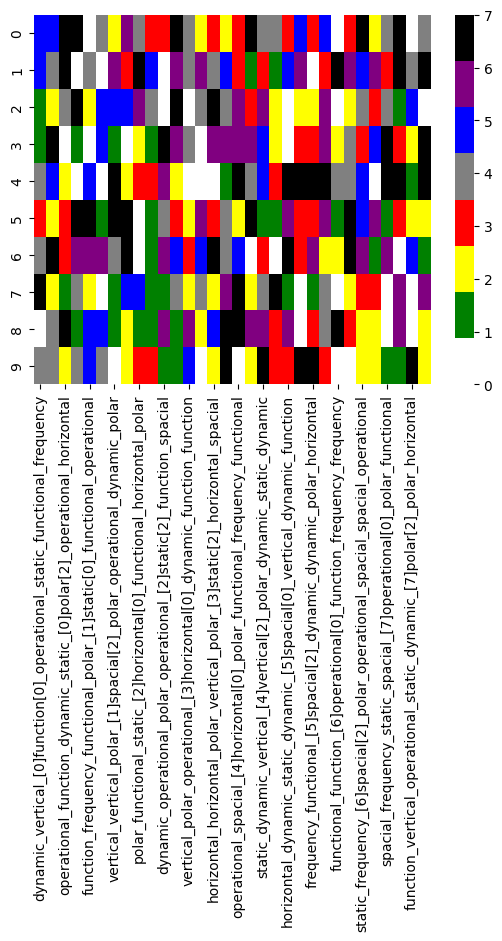

In [27]:
import matplotlib.colors as mcolors

# Create a list of colors based on the dictionary
colors = [number_to_color_map[number] for number in range(8)]

# Define your custom colormap
number_to_color_map = {
    0: "white",  # Unavailable
    1: "green",  # Pass
    2: "yellow", # Degraded
    3: "red",    # Fail
    4: "grey",   # Unknown
    5: "blue",   # NoImport
    6: "purple", # Danger
    7: "black"   # TotalCollapse
}


# Create a custom colormap
cmap = mcolors.ListedColormap(colors)

# Create the heatmap
sns.heatmap(dataframe_class.numeric_df, cmap=cmap)